# Going from the spatial domain to the frequency domain (and back) using the discrete Fourier transform

OpenCV uses a fast Fourier transform algorithm (it's implemented by the `cv2.dft` function) for computing the discrete Fourier transform, and uses the same for its inverse version (the `cv2.idft` function). The functions support optional flags specifying whether output should be real or complex (flags `cv2.DFT_REAL_OUTPUT` and `cv2.DFT_COMPLEX_OUTPUT`, respectively), and whether output values should be scaled (using the `cv2.DFT_SCALE flag`). The `np.fft.fftshift` function shifts the frequency spectrum in such a way that the amplitude corresponding to zero frequency becomes located at the center of the array, and it's easier to interpret and work with further.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]


<Figure size 432x432 with 0 Axes>

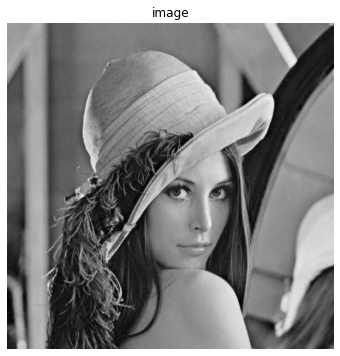

In [2]:
image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255


#############################################
print_image('Original','image',image,0,1,0,7)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image]    ])

In [3]:
#Fourier Transform
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)


###############################################
print_image('Original','image',image,0,1,0,7)
print_image('fft','dft',dft,0,1,0,7)

------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]
------  fft----------------------    Shape(512, 512, 2) dft: float32
[ [136137.34      0.  ] [-1790.49  8488.41] [ 5968.948 -4661.742] [-1076.8411  2124.9263] [-1270.0779 -4038.9883] [-4278.259  -1804.4592] [-3585.863   2798.4468] ]


In [4]:
#dft_shift = np.fft.fftshift(dft, axes=[0, 1])
dft_shift = np.fft.fftshift(dft)#, axes=[0, 1])


#####################################################
print_image('Original','image',image,0,1,0,7)
print_image('dft','dft',dft,0,1,0,7)
print_image('dft_shift','shifted',dft_shift,0,1,0,7)

------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]
------  dft----------------------    Shape(512, 512, 2) dft: float32
[ [136137.34      0.  ] [-1790.49  8488.41] [ 5968.948 -4661.742] [-1076.8411  2124.9263] [-1270.0779 -4038.9883] [-4278.259  -1804.4592] [-3585.863   2798.4468] ]
------  dft_shift----------------    Shape(512, 512, 2) shifted: float32
[ [0.        1.4627304] [-3.6204984 -0.5586777] [0.32523012 0.9583483 ] [-5.1778097  1.1794167] [ 0.6330166  -0.50476074] [1.6173921 4.245591 ] [-1.7950206  -0.66358376] ]


------  Original-----------------    Shape(512, 512) image: float32
[ 0.6627451 0.6627451 0.65882355 0.654902 0.6627451 0.6431373 0.6666667 ]
------  dft----------------------    Shape(512, 512, 2) dft: float32
[ [136137.34      0.  ] [-1790.49  8488.41] [ 5968.948 -4661.742] [-1076.8411  2124.9263] [-1270.0779 -4038.9883] [-4278.259  -1804.4592] [-3585.863   2798.4468] ]
------  dft_shift----------------    Shape(512, 512, 2) shifted: float32
[ [0.        1.4627304] [-3.6204984 -0.5586777] [0.32523012 0.9583483 ] [-5.1778097  1.1794167] [ 0.6330166  -0.50476074] [1.6173921 4.245591 ] [-1.7950206  -0.66358376] ]
------  magnitude----------------    Shape(512, 512) magnitude: float32
[ 1.4627304 3.6633494 1.0120307 5.3104367 0.80962545 4.5432367 1.9137509 ]


<Figure size 432x432 with 0 Axes>

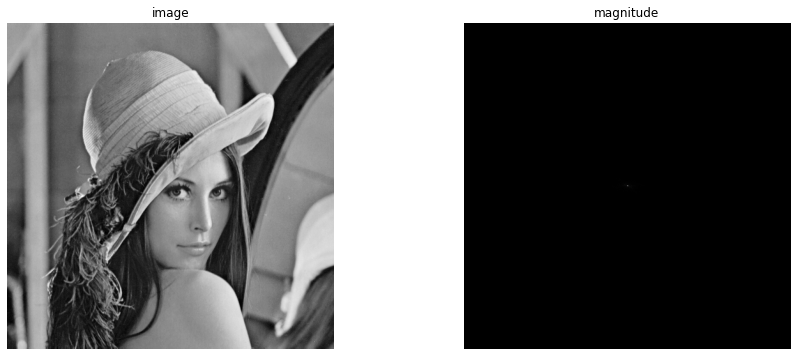

In [5]:
magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])



##########################################################
print_image('Original','image',image,0,1,0,7)
print_image('dft','dft',dft,0,1,0,7)
print_image('dft_shift','shifted',dft_shift,0,1,0,7)
print_image('magnitude','magnitude',magnitude,0,1,0,7)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image],
                    ["magnitude",magnitude]
                   ])

------  np.log(magnitude)--------    Shape(512, 512) magnitude: float32
[ 7.6060967 25.967558 0.23917854 33.393482 -4.223671 30.272793 12.981302 ]
------  magnitude -= magnitude.min()    Shape(512, 512) magnitude_min: float32
[ 77.93701 96.29848 70.5701 103.724396 66.10725 100.603714 83.31222 ]
------  magnitude /= magnitude.max()    Shape(512, 512) magnitude: float32
[ 0.2540657 0.31392193 0.23005038 0.33812958 0.21550201 0.32795653 0.27158824 ]


<Figure size 720x432 with 0 Axes>

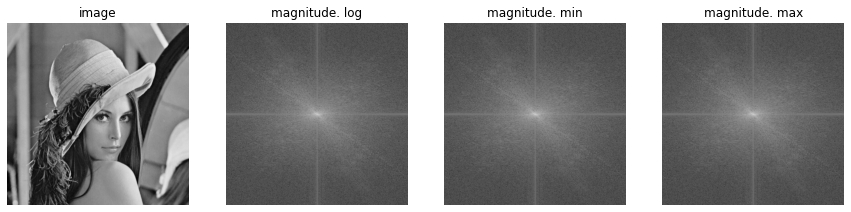

In [ ]:
#magnitude_log = np.log(magnitude)
magnitude_log = 20*np.log(magnitude)

magnitude_min = np.copy(magnitude_log)
magnitude_min -= magnitude_min.min()

magnitude_max = np.copy(magnitude_min)
magnitude_max /= magnitude_max.max()


#############################################
print_image('np.log(magnitude)','magnitude',magnitude_log,0,1,0,7)
print_image('magnitude -= magnitude.min()','magnitude_min',magnitude_min,0,1,0,7)
print_image('magnitude /= magnitude.max()','magnitude',magnitude_max,0,1,0,7)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["magnitude. log",magnitude_log],
                    ["magnitude. min",magnitude_min],
                    ["magnitude. max",magnitude_max]
                   ])

cv2.imshow('magnitude_log, magnitude_min,magnitude_max', 
           np.hstack([magnitude_log, magnitude_min,magnitude_max]))
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
a = 4 * np.eye(4)
print(a)
print(np.fft.ifft2(a))

In [ ]:
#restored = np.fft.ifft2(fft).astype(np.float32)
#print_image('np.fft.ifft2(fft)','restored',restored,0,1,0,10)

rows, cols = image.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
restored = cv2.idft(f_ishift)
restored = cv2.magnitude(restored[:,:,0],restored[:,:,1])



#####################################################
print_image('Original','image',image,0,1,0,7)
print_image('restored','restored',restored,0,1,0,7)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["restored",restored]
                   ])

In [ ]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows, cols = image.shape
crow,ccol = int(rows/2) , int(cols/2)

fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.abs(np.fft.ifft2(f_ishift))



##############################################################
print_image('Original','image',image,0,1,0,7)
print_image('restored','restored',restored,0,1,0,7)
print_image('magnitude_spectrum','magnitude_spectrum',magnitude_spectrum,0,1,0,7)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],
                    ["np.abs(np.fft.ifft2(f_ishift))",img_back],
                    ["20*np.log(np.abs(fshift))",magnitude_spectrum],
                   ])

plt.figure(figsize=(15,6))
plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imshow('image -> img_back', np.hstack([image, img_back]))
cv2.waitKey()
cv2.destroyAllWindows()